## Exercício
Agora é hora de praticar!  
  
O conjunto de dados foi baixado da UCI Machine Learning Repository.

Originalmente existiam dois dataframes relacionados com variantes tinto e branco do vinho português "Vinho Verde". Porém para a nossa prática apenas aquele referente aos vinhos brancos será utilizado. Por questões de privacidade e logística, apenas variáveis físico-químicas (entradas) e sensoriais (saídas) estão disponíveis (por exemplo, não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.).
  
  
Metadados:
  
Variáveis de entrada (físico-químicos):  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
  
Variável resposta (Sensorial):  
12 - quality (score between 0 and 10)

Importe a base **winequality-white.csv** que está em csv dentro do diretório **data**.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
vinhos = pd.read_csv('./data/winequality-white.csv', sep=';')

In [6]:
vinhos.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


Verifique com a função **.info** os campos presentes na tabela

In [4]:
vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Imprima as estatísticas padrões do dataframe com a função **.describe**

In [5]:
vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Gráficos

1) Verifique a distribuição da variável resposta para este problema (quality)

In [65]:
vinhos.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

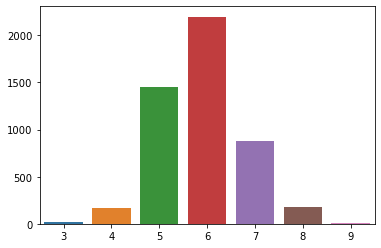

In [7]:
sns.barplot(x=vinhos.quality.value_counts().index, y=vinhos.quality.value_counts().values);

2) Verifique se há outliers nas variáveis

In [72]:
vinhos.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

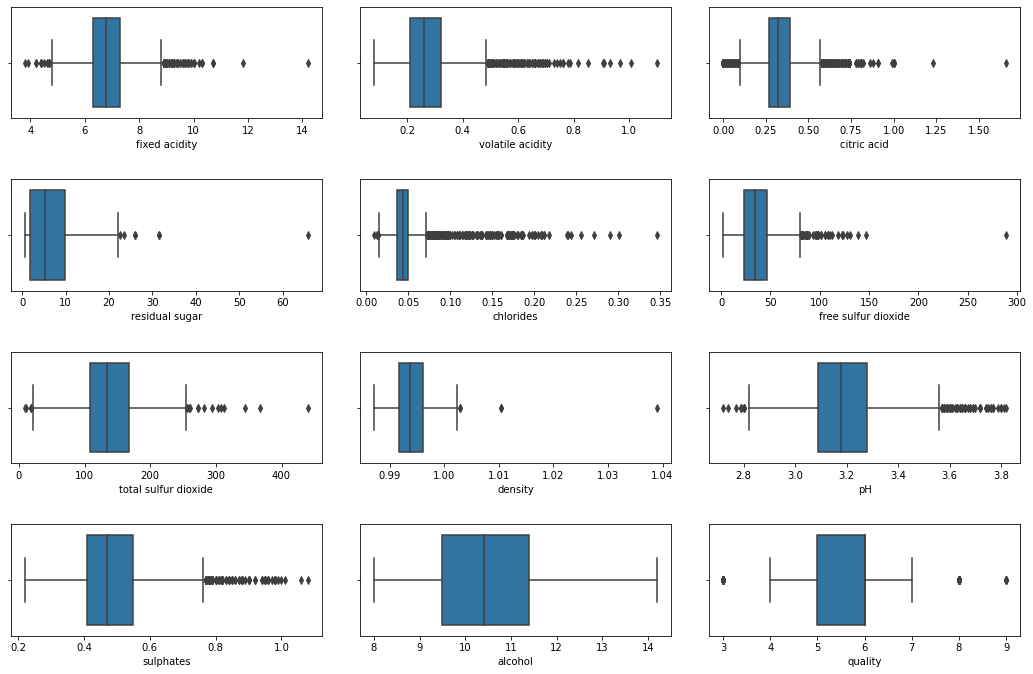

In [83]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))

cont=0
for i in range(4):
    for j in range(3):
        sns.boxplot(data=vinhos, x=vinhos.columns[cont], ax=ax[i][j]);
        cont=cont+1
        
fig.tight_layout(pad=3)

3) Construa um gráfico que permita verificar se há relação entre cada uma das variáveis retirando a qualidade dos vinhos (quality)

In [8]:
corr=vinhos.iloc[:,0:-1].corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


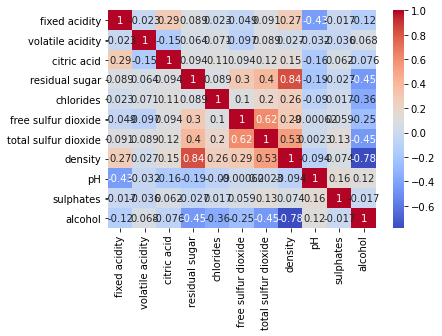

In [12]:
sns.heatmap(corr, cmap='coolwarm', annot = True);

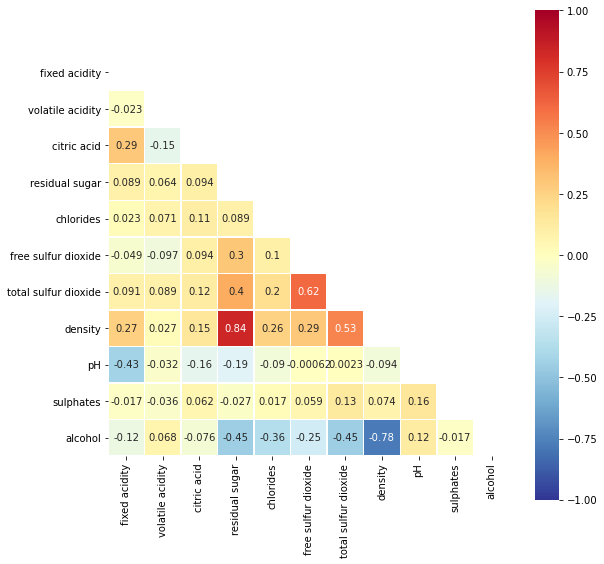

In [90]:
#outro modelo
temp = vinhos.drop(columns=['quality'])
mask = np.triu(np.ones_like(temp.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(temp.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu_r', square=True, linewidths=.5, mask=mask);

4) Dê um "zoom" na relação entre as características de densidade e açúcar residual, visto que aparentam ter alta relação. Insira também neste gráfico a variável de qualidade, a fim de verificar se há grupos claramente separados por estas duas características.

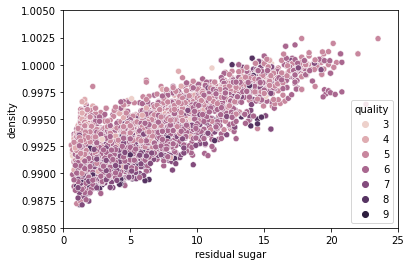

In [103]:
sns.scatterplot(data=vinhos, x='residual sugar', y='density', hue='quality')
plt.ylim(0.985, 1.005)
plt.xlim(0, 25);

5) Baseado no gráfico acima, foi possível identificar uma relação forte entre as variáveis density e residual sugar. Construa gráficos de barras para verificar a relação da média de cada uma destas características com a qualidade do vinho.

In [47]:
media = vinhos.pivot_table(index='quality', values=['density','residual sugar'], aggfunc='mean')
#media.reset_index(inplace=True)
media

,density,residual sugar
quality,,
3,0.994884,6.392500
4,0.994277,4.628221
5,0.995263,7.334969
6,0.993961,6.441606
7,0.992452,5.186477
8,0.992236,5.671429
9,0.991460,4.120000


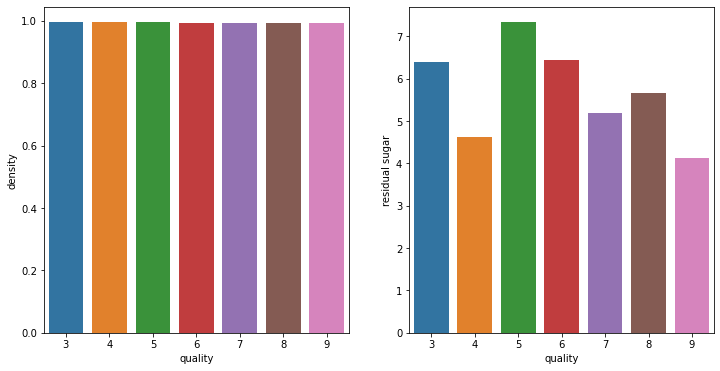

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.barplot(x=media.index,y=media['density'], ax=ax[0])
sns.barplot(x=media.index,y=media['residual sugar'], ax=ax[1]);

In [ ]:
sns.countplot()

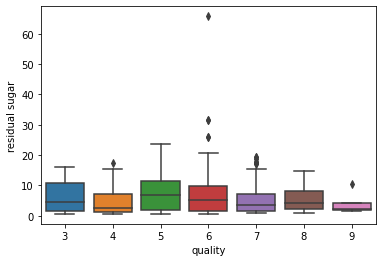

In [24]:
sns.boxplot(data=vinhos, y='residual sugar', x='quality');

In [37]:
vinhos.pivot_table(index='quality', values = 'residual sugar', aggfunc='count')

,residual sugar
quality,
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


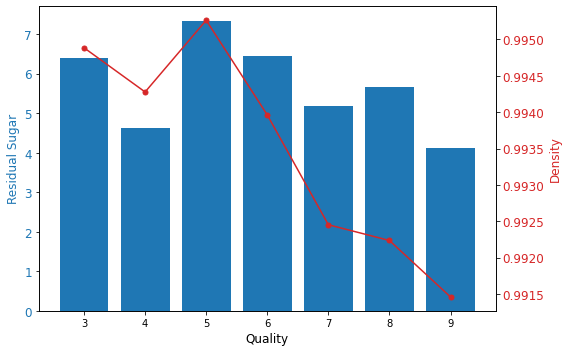

In [15]:
media = vinhos.pivot_table(index='quality', values=['density','residual sugar'], aggfunc='mean')

fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.set_xlabel('Quality', size=12)
ax1.set_ylabel('Residual Sugar', color=color, size=12)
ax1.bar(media.index, media['residual sugar'], color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Density', color=color, size=12)  # we already handled the x-label with ax1
ax2.plot(media.index, media['density'], color=color, marker='o', markersize=5, label=media['density'].values)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

6) Construa gráficos de relação entre todas as variáveis, porém agora insira a variável de qualidade a fim de verificar se é possível separar os grupos.  
Obs.: utilize o pairplot

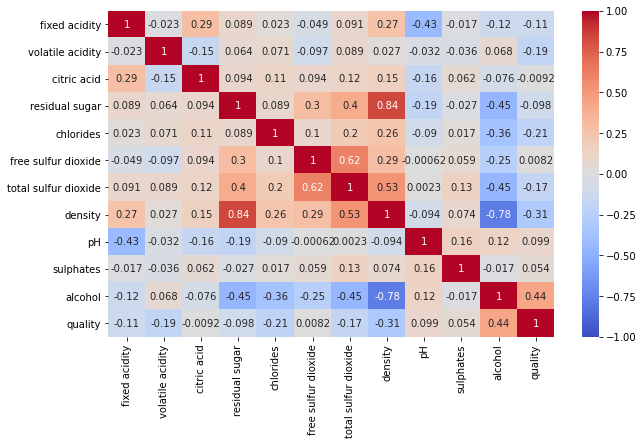

In [16]:
corr=vinhos.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', annot = True, vmin=-1, vmax=1, center= 0);

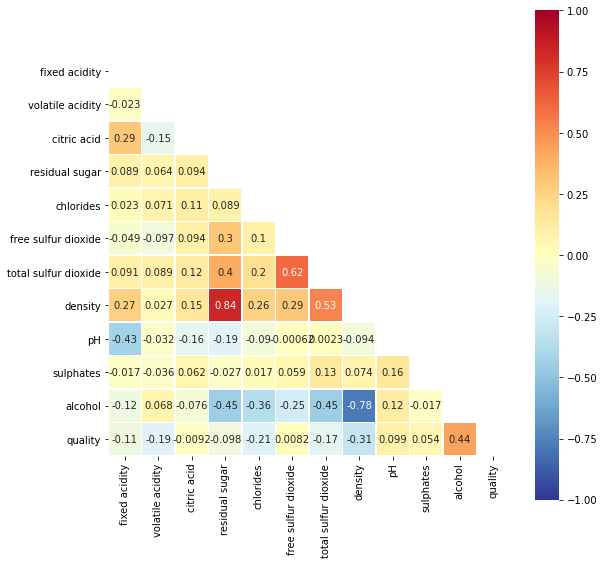

In [91]:
#outro modelo
mask = np.triu(np.ones_like(vinhos.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(vinhos.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu_r', square=True, linewidths=.5, mask=mask);